In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1. Introduction des données.

# 1.1. Récupération des données.

In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

In [3]:
from sklearn.pipeline import Pipeline

# 1.2. Aperçu des données disponibles.

In [4]:
X

array([[ 1.61383833, -0.49115086],
       [ 0.08984723,  0.50439056],
       [ 0.74721047, -0.36911116],
       [-1.10174514,  0.23685641],
       [-0.72871455,  0.14652347],
       [-0.65891281,  0.857088  ],
       [ 0.22828266,  0.73453868],
       [ 1.39439184, -0.45063627],
       [ 0.87158283,  0.70852888],
       [ 0.88304472, -0.12658445],
       [ 0.38220326,  0.76957897],
       [-0.32279169,  0.92145523],
       [ 1.29900621, -0.64914275],
       [-0.63569974,  0.91873422],
       [ 1.96899387,  0.297549  ],
       [ 1.21073294,  0.37721455],
       [ 1.13998191, -0.36088456],
       [ 1.06805159, -0.53460667],
       [ 0.49598571,  0.66135542],
       [-0.26038715,  0.88295876],
       [-0.06516219,  0.13092506],
       [ 1.87005845, -0.18659309],
       [ 0.03146515,  0.79868048],
       [-1.03151461,  0.35788726],
       [ 0.45814234,  0.00308109],
       [ 0.40767679,  0.9574049 ],
       [-0.9379972 ,  0.46846678],
       [ 2.02675758,  0.09006383],
       [ 0.73867736,

In [5]:
y

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [6]:
print(X.shape)
print(y.shape)

(100, 2)
(100,)


# 2. Data visualizations

La matrice X rassemble les 2 coordonnées des 100 points à placer dans le plan.
* En abcisses, colonne 0 de X.
* En ordonnées, colonne 1 de X.

On trace de couleur différente les points dont la ligne correspond à un 0 ou un 1 dans y.

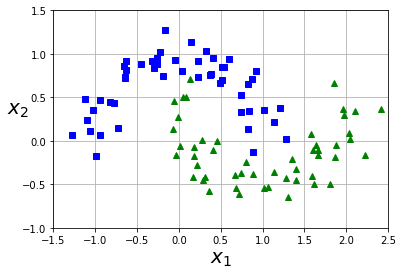

In [7]:
import matplotlib.pyplot as plt

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

# 3. Classification SVM non linéaire

Créons un Pipeline composé d'un transformateur PolynomialFeatures, suivi d'un StandardScaler et d'un LinearSVC. Testons ceci sur le jeu de données moons :

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

polynomial_svm_clf = Pipeline((
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge"))
    ))
polynomial_svm_clf.fit(X, y)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

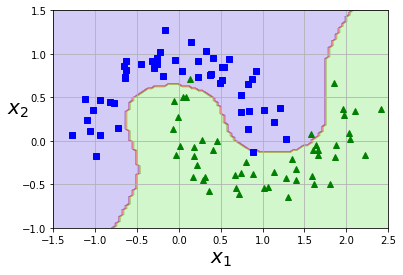

In [9]:
def plot_predictions1(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    #y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    #plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions1(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

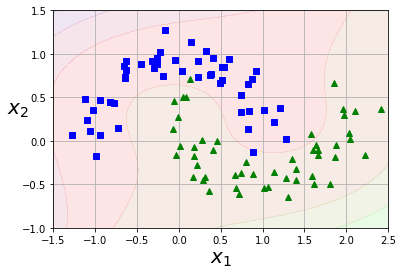

In [10]:
def plot_predictions2(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    #y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    #plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions2(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

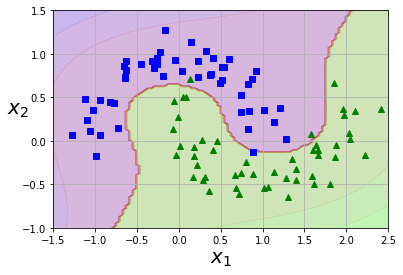

In [11]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

# 3.1 Noyau polynomial

Testons l'astuce du noyau polynomial sur le jeu de données moons.

Ce code entraîne un classificateur SVM en utilisant un noau polynomial de degré 3. 

In [12]:
from sklearn.svm import SVC

poly3_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly3_kernel_svm_clf.fit(X, y)

poly10_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly10_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

Le résultat est présenté sur la fugure de gauche. A droite est présenté un autre classificateur SVM utilisant un noyau polynomial de degré 10. Ce modèle surajuste.

Text(0.5, 1.0, '$d=10, r=100, C=5$')

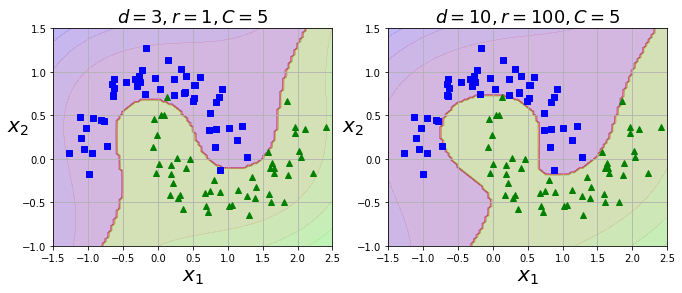

In [13]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly3_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly10_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

# 3.2 Noyau radial gaussien

Essayons le noyau radial gaussien (RBF) avec la classe SVC.

In [14]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

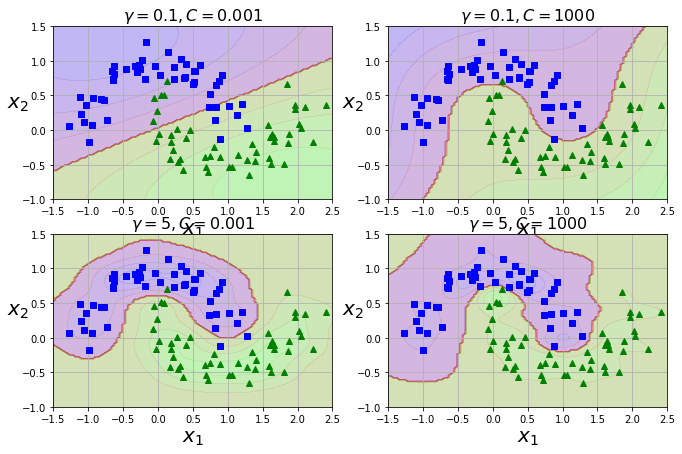

In [15]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)


# 4. Arbre de décision

# 4.1 Régularisation utilisant min_samples_leaf

In [16]:
from matplotlib.colors import ListedColormap

from sklearn.tree import DecisionTreeClassifier

Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

DecisionTreeClassifier(min_samples_leaf=4, random_state=42)

In [17]:
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        #plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
        plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    if plot_training:
        plt.plot(X[['PetalLengthCm']][y==0], X[['PetalWidthCm']][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[['PetalLengthCm']][y==1], X[['PetalWidthCm']][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[['PetalLengthCm']][y==2], X[['PetalWidthCm']][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

Text(0.5, 1.0, 'min_samples_leaf = 4')

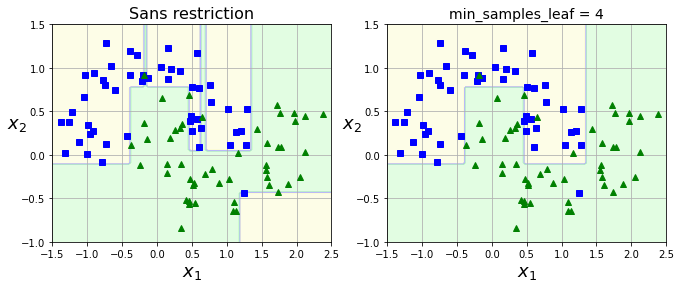

In [18]:
plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False, plot_training=False)
plt.title("Sans restriction", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False, plot_training=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

In [19]:
def plot_decision_boundary2(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    #plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
        plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    if plot_training:
        plt.plot(X[['PetalLengthCm']][y==0], X[['PetalWidthCm']][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[['PetalLengthCm']][y==1], X[['PetalWidthCm']][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[['PetalLengthCm']][y==2], X[['PetalWidthCm']][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

Text(0.5, 1.0, 'min_samples_leaf = 4')

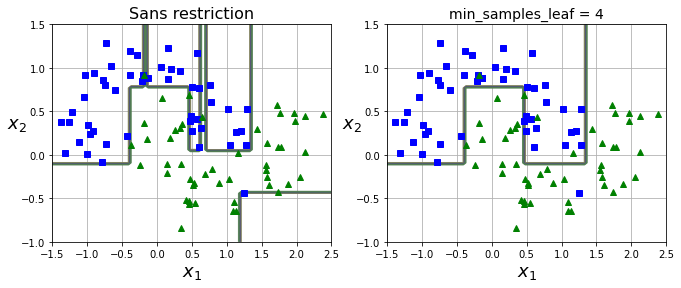

In [20]:
plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary2(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False, plot_training=False)
plt.title("Sans restriction", fontsize=16)
plt.subplot(122)
plot_decision_boundary2(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False, plot_training=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

In [21]:
def plot_decision_boundary3(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
        plot_dataset(X, y, axes)
    if plot_training:
        plt.plot(X[['PetalLengthCm']][y==0], X[['PetalWidthCm']][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[['PetalLengthCm']][y==1], X[['PetalWidthCm']][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[['PetalLengthCm']][y==2], X[['PetalWidthCm']][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

Text(0.5, 1.0, 'min_samples_leaf = 4')

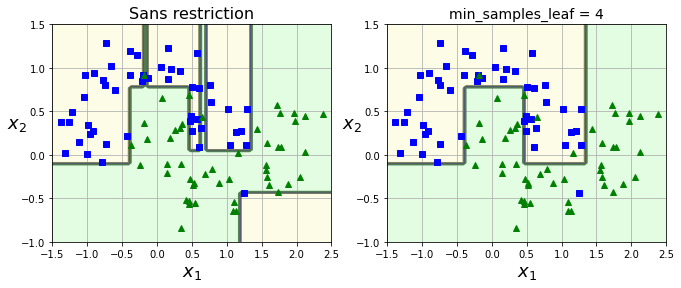

In [22]:
plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary3(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False, plot_training=False)
plt.title("Sans restriction", fontsize=16)
plt.subplot(122)
plot_decision_boundary3(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False, plot_training=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

La figure présente présente deux arbres de décision. A gauche, l'arbre de décision est entraîné avec les hyperparamètres par défaut (c.-à-d. sans restriction), tandis que celui de droite est entraîné avec min_sample_leaf=4. Il est assez évident que le modèle de gauche surajuste les données, alors que celui de droite se généralisera probablement mieux.

# 4.2 Arbre de décision réglé précisément 

In [23]:
X_1000, y_1000 = make_moons(n_samples=1000, noise=0.4, random_state=42)

In [24]:
from sklearn.model_selection import train_test_split  
X_1000_train, X_1000_test, y_1000_train, y_1000_test = train_test_split(X_1000, y_1000, test_size=0.2, random_state=42)

In [25]:
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1, verbose=1, cv=3)

grid_search_cv.fit(X_1000_train, y_1000_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    3.2s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [26]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=4, random_state=42)

In [27]:
from sklearn.metrics import accuracy_score

y_1000_pred = grid_search_cv.predict(X_1000_test)
accuracy_score(y_1000_test, y_1000_pred)

0.855

# 5. Méthode d'ensemble : Classification à vote majoritaire

# 5.1 Classificateur à vote rigide (en anglais, *hard voting*)

In [28]:
X_500, y_500 = make_moons(n_samples=500, noise=0.30, random_state=42)
X_500_train, X_500_test, y_500_train, y_500_test = train_test_split(X_500, y_500, random_state=42)

Le code suivant crée en entraîne un classificateur à vote majoritaire de Scikit-Learn, composé de trois classificateurs très différents.

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="auto", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [30]:
voting_clf.fit(X_500_train, y_500_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(random_state=42,
                                                 solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42)),
                             ('svc', SVC(gamma='auto', random_state=42))])

Examinons l'exactitude de chacun des classificateurs sur le jeu d'entraînement :

In [31]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_500_train, y_500_train)
    y_500_pred = clf.predict(X_500_test)
    print(clf.__class__.__name__, accuracy_score(y_500_test, y_500_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.896


Et voilà ! Le classificateur à vote majoritaire obtient des résultats légèrement meilleurs que ceux de chacun des classificateurs pris individuellement.

# 5.2 Classificateur à vote souple

In [32]:
log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="auto", probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_500_train, y_500_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(random_state=42,
                                                 solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42)),
                             ('svc',
                              SVC(gamma='auto', probability=True,
                                  random_state=42))],
                 voting='soft')

In [33]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_500_train, y_500_train)
    y_500_pred = clf.predict(X_500_test)
    print(clf.__class__.__name__, accuracy_score(y_500_test, y_500_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.912


Si vous modifiez le code ci-dessus pour passer à un vote souple, vous vous apercevrez que le classificateur par vote atteint désormais une excatitude de 91 % !

**5.2.1 Bagging (et pasting) dans Scikit-Learn**

Le cod suivant entraîne un ensemble de 500 classificateurs de type arbre de décision, chacun d'entre eux étant entraîné sur 100 observations tirées au hasard avec remise dans le jeu d'entraînement (c'est donc un exemple de bagging, mais si vous préférez au contraire effectuer un pasting, c'est-à-dire un tirage sans remise, précisez bootstrap=False). 

In [34]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_500_train, y_500_train)
y_500_pred = bag_clf.predict(X_500_test)

In [35]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_500_test, y_500_pred))

0.904


**Comparaison à un arbre de décision unique.**

In [36]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_500_train, y_500_train)
y_500_pred_tree = tree_clf.predict(X_500_test)
print(accuracy_score(y_500_test, y_500_pred_tree))

0.856


In [37]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

Text(0.5, 1.0, 'Decision Trees with Bagging')

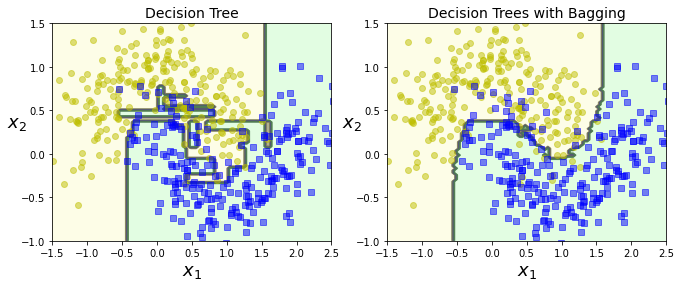

In [38]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X_500, y_500)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X_500, y_500)
plt.title("Decision Trees with Bagging", fontsize=14)

La figure précédente compare les frontières de décision d'un arbre de décision unique et d'un ensemble constitué par bagging et composé de 500 arbres. Comme vous pouvez le voir, les préductions de l'ensemble se généraliseront vraisemblablement beaucoup mieux que celles de l'arbre de décision unique : l'ensemble a un biais comparable mais une variance plus réduite (il fait à peu près le même nombre d'erreurs sur le jeu d'entraînement, mais la frontière de décision est moins irrégulière). 

**5.2.2 Evaluation hors sélection (en anglais, *Out-of-Bag evaluation*)**

In [39]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True, random_state=40)
bag_clf.fit(X_500_train, y_500_train)
bag_clf.oob_score_

0.8986666666666666

D'après cette évaluation oob, le BaggingClassifier devrait vraisemblablement atteindre une exactitude d'environ 90,1 % sur le jeu de test. Vérifions cela :

In [40]:
from sklearn.metrics import accuracy_score
y_500_pred = bag_clf.predict(X_500_test)
accuracy_score(y_500_test, y_500_pred)

0.912

Nous obtenons une exactitude de 91,2 % sur le jeu de test, c'est très proche !

In [41]:
bag_clf.oob_decision_function_

array([[0.32275132, 0.67724868],
       [0.34117647, 0.65882353],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.09497207, 0.90502793],
       [0.31147541, 0.68852459],
       [0.01754386, 0.98245614],
       [0.97109827, 0.02890173],
       [0.97765363, 0.02234637],
       [0.74404762, 0.25595238],
       [0.        , 1.        ],
       [0.7173913 , 0.2826087 ],
       [0.85026738, 0.14973262],
       [0.97222222, 0.02777778],
       [0.0625    , 0.9375    ],
       [0.        , 1.        ],
       [0.97837838, 0.02162162],
       [0.94642857, 0.05357143],
       [1.        , 0.        ],
       [0.01704545, 0.98295455],
       [0.39473684, 0.60526316],
       [0.88700565, 0.11299435],
       [1.        , 0.        ],
       [0.97790055, 0.02209945],
       [0.        , 1.        ],
       [0.99428571, 0.00571429],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.62569832, 0.37430168],
       [0.

L'évaluation oob estime que la duxième observation d'entraînement a une probabilité de 60,6 % d'appartenir à la classe négative (et 39,4 % d'appartenir à la classe positive).

___________________________________________________________________________________________

# Annexe Instabilité

**Remarque.** *Il ne s'agit pas du jeu de données Moon, mais d'un jeu de données aléatoire.*

**4.2.1 Sensibilité à la rotation**

In [42]:
def plot_decision_boundary4(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
        #plot_dataset(X, y, axes)
    if plot_training:
        plt.plot(X[['PetalLengthCm']][y==0], X[['PetalWidthCm']][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[['PetalLengthCm']][y==1], X[['PetalWidthCm']][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[['PetalLengthCm']][y==2], X[['PetalWidthCm']][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)
    

Text(0, 0.5, '$x_2$')

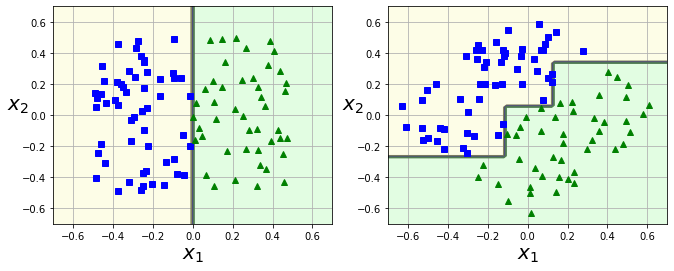

In [43]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_decision_boundary4(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False, plot_training=False)
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "bs")
plt.plot(Xs[:, 0][ys==2], Xs[:, 1][ys==2], "g^")
plt.axis([-0.7, 0.7, -0.7, 0.7])
plt.grid(True, which='both')
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plt.subplot(122)
plot_decision_boundary4(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False, plot_training=False)
plt.plot(Xsr[:, 0][ys==0], Xsr[:, 1][ys==0], "bs")
plt.plot(Xsr[:, 0][ys==2], Xsr[:, 1][ys==2], "g^")
plt.axis([-0.7, 0.7, -0.7, 0.7])
plt.grid(True, which='both')
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

Comme vous l'avez peut-être remarqué, les arbres de décision adorent les frontières de décision orthogornales (tous les partages s'effectuent perpendiculairement à un axe) ce qui les rend sensibles à la rotation du jeu d'entraînement. La figure précédente représente par exemple un jeu de données linéairement séparable très simple: à gauche, un arbre de décision permet de le partager aisément, tandis qu'à droite après une rotation de 45° des données, la frontière de décision paraît plus compliquée que nécessaire. Bien que les deux arbres de décision ajustent parfaitement le jeu de données, il est fort probable que le modèle de droite ne se généralisera pas bien. Une taçon de limiter ce problème consiste à utiliser une analyse en composantes principales.